<a href="https://colab.research.google.com/github/chayaphon/DADS6003/blob/main/Classification/Logistic_Regression/stock_prediction.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
### Uncomment to install required library
# !pip install numpy
# !pip install pandas
# !pip install yfinance
# !pip install TA-Lib
# !pip install matplotlib
# !pip install scikit-learn

In [20]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [21]:
### Import Data
st = yf.Ticker('ptt.bk')
interval = '1h'
start = '2022-10-01'
end = '2024-02-21'
df = st.history(interval=interval,start=start,end=end)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2022-10-03 10:00:00+07:00,34.25,34.25,33.75,34.00,0,0.0,0.0
2022-10-03 11:00:00+07:00,34.00,34.25,34.00,34.25,11876309,0.0,0.0
2022-10-03 12:00:00+07:00,34.00,34.25,34.00,34.00,5620009,0.0,0.0
2022-10-03 14:00:00+07:00,34.00,34.25,34.00,34.00,5377777,0.0,0.0
2022-10-03 15:00:00+07:00,34.25,34.25,34.00,34.25,5994994,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-20 11:00:00+07:00,35.50,35.75,35.50,35.75,9732000,0.0,0.0
2024-02-20 12:00:00+07:00,35.75,35.75,35.50,35.75,165764,0.0,0.0
2024-02-20 14:00:00+07:00,35.75,35.75,35.50,35.75,945420,0.0,0.0


<hr>

# Part 1 : Standard Features

In [22]:
df1 = df.copy().dropna()

In [23]:
### Feature Selected
df1 = df1.iloc[:,:4]
df1

,Open,High,Low,Close
Datetime,,,,
2022-10-03 10:00:00+07:00,34.25,34.25,33.75,34.00
2022-10-03 11:00:00+07:00,34.00,34.25,34.00,34.25
2022-10-03 12:00:00+07:00,34.00,34.25,34.00,34.00
2022-10-03 14:00:00+07:00,34.00,34.25,34.00,34.00
2022-10-03 15:00:00+07:00,34.25,34.25,34.00,34.25
...,...,...,...,...
2024-02-20 11:00:00+07:00,35.50,35.75,35.50,35.75
2024-02-20 12:00:00+07:00,35.75,35.75,35.50,35.75
2024-02-20 14:00:00+07:00,35.75,35.75,35.50,35.75


In [24]:
### Define Target/Dependent Variable
X = df1
y = np.where(df1['Close'].shift(-1) > df1['Close'],1,-1)

### Split dataset for training and test
split = int(0.7*len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

### Fit to model
model = LogisticRegression(max_iter=1000)
model = model.fit (X_train,y_train)

### Coefficients
coefficients = pd.DataFrame(zip(X.columns, np.transpose(model.coef_)), columns=['Feature', 'Coefficient'])
print(coefficients)

  Feature           Coefficient
0    Open  [0.2001171910981606]
1    High   [3.110249006593475]
2     Low  [3.1037950101343084]
3   Close  [-6.465880149302504]


In [25]:
### Actual and Pridiction with Prob
prediction = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:, 1] 
result = X_test.copy()
result['Actual'] = y_test
result['Predict'] = prediction
result['probabilities'] = probabilities
result[result['probabilities']>= 0.5].head()

,Open,High,Low,Close,Actual,Predict,probabilities
Datetime,,,,,,,
2023-09-25 10:00:00+07:00,33.50,33.75,33.25,33.25,1,1,0.606737
2023-09-26 15:00:00+07:00,33.75,34.00,33.50,33.50,1,1,0.603648
2023-09-28 15:00:00+07:00,34.00,34.25,33.75,33.75,-1,1,0.600550
2023-09-28 16:00:00+07:00,33.75,34.00,33.50,33.50,-1,1,0.603648
2023-10-02 10:00:00+07:00,33.75,33.75,33.00,33.00,1,1,0.789874


In [26]:
### Confusion Matrix
print(metrics.confusion_matrix(y_test, prediction))

[[431  15]
 [142  19]]


In [27]:
### Precision, Recall, and F1-Score
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

          -1       0.75      0.97      0.85       446
           1       0.56      0.12      0.19       161

    accuracy                           0.74       607
   macro avg       0.66      0.54      0.52       607
weighted avg       0.70      0.74      0.67       607



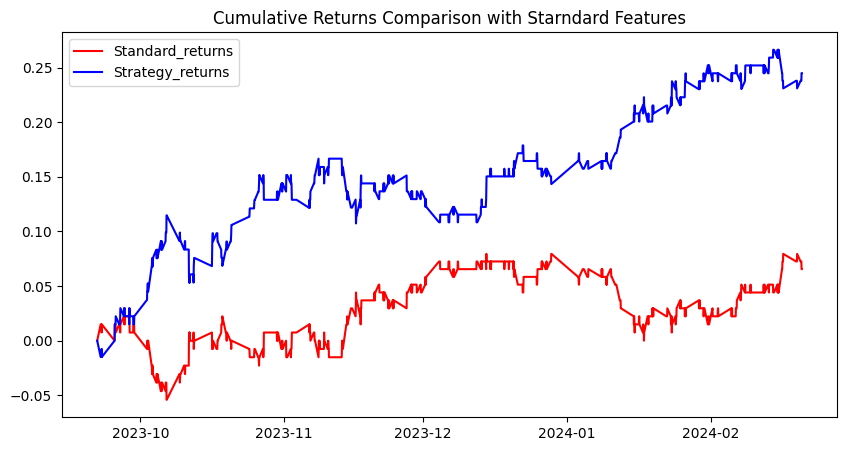

In [28]:
### Strategy returns
df1['Predicted_Signal'] = model.predict(X)
df1['Standard_returns'] = np.log(df1['Close']/df1['Close'].shift(1))
Cumulative_Standard_returns1 = np.cumsum(df1[split:]['Standard_returns'])

df1['Strategy_returns'] = df1['Standard_returns'] * df1['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns1 = np.cumsum(df1[split:]['Strategy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Standard_returns1, color='red', label = 'Standard_returns')
plt.plot(Cumulative_Strategy_returns1, color='blue', label = 'Strategy_returns')
plt.title('Cumulative Returns Comparison with Starndard Features')
plt.legend()
plt.show()

<hr>

# Part 2 : Additional Features

In [29]:
df2 = df.copy().dropna()

In [30]:
### Add features

# Technical Indicators
import talib as ta

df2 = df2.iloc[:,:4]
df2['S_10'] = df2['Close'].rolling(window=10).mean()
df2['Corr'] = df2['Close'].rolling(window=10).corr(df2['S_10'])
df2['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df2['Open-Close'] = df2['Open'] - df2['Close'].shift(1)
df2['Open-Open'] = df2['Open'] - df2['Open'].shift(1)
df2 = df2.dropna()
df2

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,
2022-10-06 10:00:00+07:00,34.50,35.00,34.50,35.00,34.500,0.627703,69.609793,0.00,0.00
2022-10-06 11:00:00+07:00,35.00,35.00,34.50,35.00,34.575,0.707355,69.609793,0.00,0.50
2022-10-06 12:00:00+07:00,35.00,35.00,34.75,35.00,34.625,0.809630,69.609793,0.00,0.00
2022-10-06 14:00:00+07:00,34.75,35.00,34.75,35.00,34.675,0.853265,69.609793,-0.25,-0.25
2022-10-06 15:00:00+07:00,35.00,35.00,34.50,34.75,34.700,0.765135,57.775886,0.00,0.25
...,...,...,...,...,...,...,...,...,...
2024-02-20 11:00:00+07:00,35.50,35.75,35.50,35.75,35.800,-0.066314,58.037368,-0.25,-0.25
2024-02-20 12:00:00+07:00,35.75,35.75,35.50,35.75,35.800,-0.264436,58.037368,0.00,0.25
2024-02-20 14:00:00+07:00,35.75,35.75,35.50,35.75,35.775,0.261701,58.037368,0.00,0.00


In [31]:
### Define Target/Dependent Variable
X = df2
y = np.where(df2['Close'].shift(-1) > df2['Close'],1,-1)

### Split dataset for training and test
split = int(0.7*len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

### Fit to model
model = LogisticRegression(max_iter=1000)
model = model.fit (X_train,y_train)

### Coefficients
coefficients = pd.DataFrame(zip(X.columns, np.transpose(model.coef_)), columns=['Feature', 'Coefficient'])
print(coefficients)

      Feature                Coefficient
0        Open      [0.12530371708695776]
1        High        [3.396842134629628]
2         Low        [3.391715505794877]
3       Close       [-5.277306359497466]
4        S_10      [-1.6475951127256463]
5        Corr  [-0.00039422710822984206]
6         RSI     [-0.04372288905242668]
7  Open-Close    [-0.038715310808373586]
8   Open-Open       [0.2133511541601892]


In [32]:
### Actual and Pridiction with Prob
prediction = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:, 1] 
result = X_test.copy()
result['Actual'] = y_test
result['Predict'] = prediction
result['probabilities'] = probabilities
result[result['probabilities']>= 0.5].head()

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open,Actual,Predict,probabilities
Datetime,,,,,,,,,,,,
2023-09-25 10:00:00+07:00,33.50,33.75,33.25,33.25,33.525,0.356095,41.208903,-0.25,-0.25,1,1,0.606777
2023-09-26 15:00:00+07:00,33.75,34.00,33.50,33.50,33.700,-0.301511,44.469426,0.00,0.25,1,1,0.624640
2023-09-28 15:00:00+07:00,34.00,34.25,33.75,33.75,33.900,0.638594,46.646425,-0.25,0.25,-1,1,0.623172
2023-09-28 16:00:00+07:00,33.75,34.00,33.50,33.50,33.875,0.278124,39.508667,0.00,-0.25,-1,1,0.581992
2023-10-02 10:00:00+07:00,33.75,33.75,33.00,33.00,33.650,0.812614,27.590173,0.25,0.00,1,1,0.795729


In [33]:
### Confusion Matrix
print(metrics.confusion_matrix(y_test, prediction))

[[418  24]
 [135  24]]


In [34]:
### Precision, Recall, and F1-Score
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

          -1       0.76      0.95      0.84       442
           1       0.50      0.15      0.23       159

    accuracy                           0.74       601
   macro avg       0.63      0.55      0.54       601
weighted avg       0.69      0.74      0.68       601



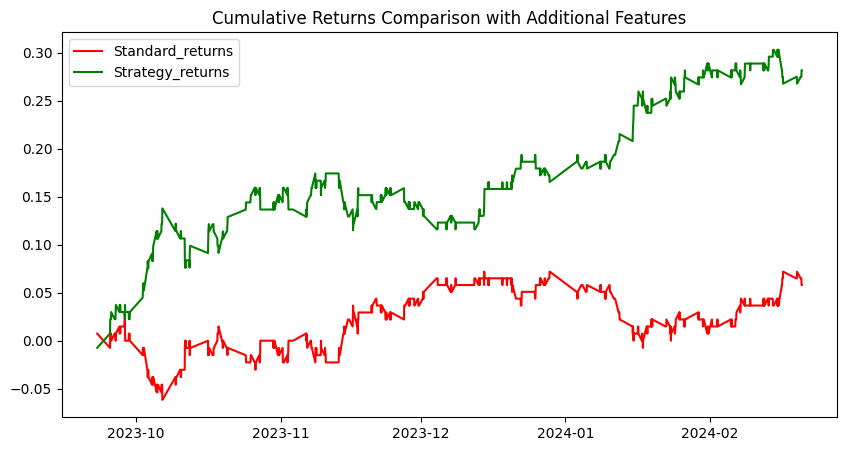

In [35]:
### Strategy returns
df2['Predicted_Signal'] = model.predict(X)
df2['Standard_returns'] = np.log(df2['Close']/df2['Close'].shift(1))
Cumulative_Standard_returns2 = np.cumsum(df2[split:]['Standard_returns'])

df2['Strategy_returns'] = df2['Standard_returns'] * df2['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns2 = np.cumsum(df2[split:]['Strategy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Standard_returns2, color='red', label = 'Standard_returns')
plt.plot(Cumulative_Strategy_returns2, color='green', label = 'Strategy_returns')
plt.title('Cumulative Returns Comparison with Additional Features')
plt.legend()
plt.show()

<hr>

### Plot two graps of Srategy Returns (before and after adding new feature)

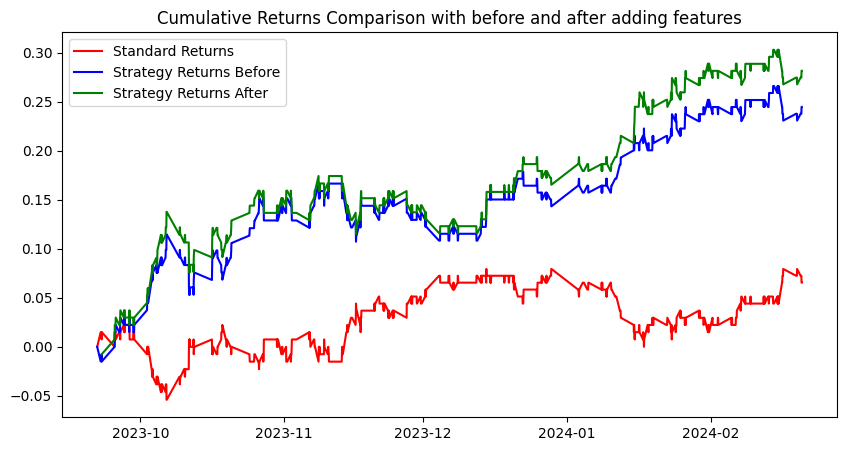

In [36]:
### Compare betweeen before and after adding new feautures
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Standard_returns1, color='red', label = 'Standard Returns')
plt.plot(Cumulative_Strategy_returns1, color='blue', label = 'Strategy Returns Before')
plt.plot(Cumulative_Strategy_returns2, color='green', label = 'Strategy Returns After')
plt.title('Cumulative Returns Comparison with before and after adding features')
plt.legend()
plt.show()